In [14]:
using OrdinaryDiffEq
using Plots
using Profile #, ProfileVega

In [2]:
function HenonHeilesODE2nd!(ddu,du,u,par,t)

    q1=u[1]
    q2=u[2]
    ddu[1]=-q1-2*q1*q2
    ddu[2]=-q2-q1*q1+q2*q2

    return nothing
 
 end

q0=[0.0, 0.1]
p0=[0.5, 0.0]

u0=vcat(p0,q0)
p=nothing

### Short Integration

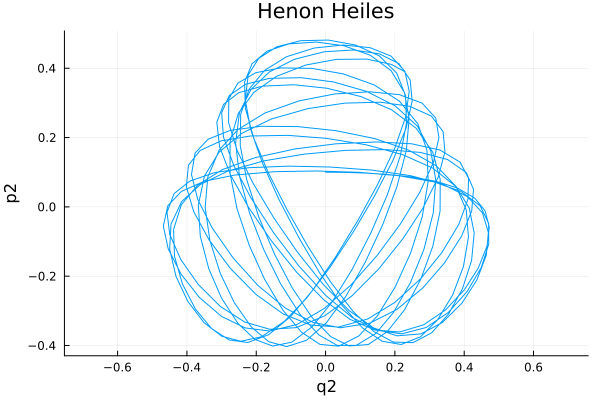

In [3]:
t0=0.
tF=100.
tspan=(t0,tF)
probshort=SecondOrderODEProblem(HenonHeilesODE2nd!,p0,q0,(t0,tF),p)

tol=1e-14
sol0=solve(probshort, DPRKN12(),  abstol=tol, reltol=tol, adaptive=true)

q1= [u[1] for u in sol0.u]
q2 = [u[2] for u in sol0.u]
p1 = [u[3] for u in sol0.u]
p2 = [u[4] for u in sol0.u]

pl1=plot(p1,p2, aspect_ratio=1, title="Henon Heiles", legend=false, xlabel="q2", ylabel="p2")

In [4]:
solve(probshort, DPRKN12(),  save_everystep=false, 
                   adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false)
@time sol_ = solve(probshort, DPRKN12(),  save_everystep=false, 
                   adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false);

  0.000326 seconds (5.11 k allocations: 111.219 KiB)


In [5]:
solve(probshort, Vern9(),  save_everystep=false, 
                   adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false)
@time sol_ = solve(probshort, Vern9(),  save_everystep=false, 
                   adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false);

  0.001514 seconds (12.07 k allocations: 227.781 KiB)


### increasing the integration time

In [6]:
t0=0.
tF=1000.
tspan=(t0,tF)
problong=SecondOrderODEProblem(HenonHeilesODE2nd!,p0,q0,(t0,tF),p)

tol=1e-14

solve(problong, DPRKN12(), save_everystep=false, 
                   adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false)
@time sol_ = solve(problong, DPRKN12(),  save_everystep=false, 
                   adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false);

  0.002548 seconds (48.76 k allocations: 906.969 KiB)


In [7]:
solve(problong, Vern9(),  save_everystep=false, 
                   adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false)
@time sol_ = solve(problong, Vern9(),  save_everystep=false, 
                   adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false);

  0.014319 seconds (118.12 k allocations: 2.110 MiB)


### Profiling

In [8]:
Profile.clear()
@profile solve(problong, DPRKN12(),  save_everystep=false, 
               adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false)
Profile.print(format=:flat)

 Count  Overhead File                    Line Function
 =====  ======== ====                    ==== ========
     1         0 In[2]                      5 HenonHeilesODE2nd!
     1         1 @Base/array.jl           969 setindex!
     4         2 @Base/boot.jl            370 eval
     4         0 @Base/essentials.jl      816 #invokelatest#2
     4         0 @Base/essentials.jl      813 invokelatest
     4         0 @Base/loading.jl        1899 include_string(mapexpr::typeof(...
     4         0 @Base/task.jl            514 (::IJulia.var"#15#18")()
     2         0 ...EqBase/src/solve.jl   929 #solve#40
     2         0 ...EqBase/src/solve.jl   557 #solve_call#34
     2         0 ...EqBase/src/solve.jl  1006 #solve_up#42
     2         0 ...EqBase/src/solve.jl   919 kwcall(::NamedTuple{(:save_ever...
     2         0 ...EqBase/src/solve.jl   523 solve_call
     2         0 ...EqBase/src/solve.jl   992 solve_up
     4         0 ...ia/src/eventloop.jl     8 eventloop(socket::ZMQ.Socket)


In [19]:
using  ProfileCanvas
@profview solve(problong, DPRKN12(),  save_everystep=false, 
                adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false)
@profview solve(problong, DPRKN12(),  save_everystep=false, 
                adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false)
#ProfileCanvas.html_file(joinpath(@__DIR__, "flame.html"))

ProfileCanvas.ProfileData(Dict{String, ProfileCanvas.ProfileFrame}("1" => ProfileCanvas.ProfileFrame("root", "", "", 0, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#15", "task.jl", "./task.jl", 514, 4, missing, 0x10, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("eventloop", "eventloop.jl", "/home/mikel/.julia/packages/IJulia/Vo51o/src/eventloop.jl", 8, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("invokelatest", "essentials.jl", "./essentials.jl", 813, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#invokelatest#2", "essentials.jl", "./essentials.jl", 816, 4, missing, 0x01, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("execute_request", "execute_request.jl", "/home/mikel/.julia/packages/IJulia/Vo51o/src/execute_request.jl", 67, 4, missing, 0x01, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("softscope_include_string", "SoftGlobalScope.jl", "/home/mikel/.julia/packages/SoftGlobalScope/u4UzH/src/SoftGlobalScope.jl", 65, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("include_string", "loading.jl", "./loading.jl", 1899, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("eval", "boot.jl", "./boot.jl", 370, 4, missing, 0x01, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("solve", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 919, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#solve#40", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 929, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("solve_up", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 992, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#solve_up#42", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 1006, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("solve_call", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 523, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#solve_call#34", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 557, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("__solve", "solve.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/solve.jl", 1, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#__solve#746", "solve.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/solve.jl", 6, 4, missing, 0x01, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("solve!", "solve.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/solve.jl", 538, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("perform_step!", "rkn_perform_step.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/perform_step/rkn_perform_step.jl", 1358, 4, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("perform_step!", "rkn_perform_step.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/perform_step/rkn_perform_step.jl", 1534, 3, missing, 0x01, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("ODE_DEFAULT_NORM", "common_defaults.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/common_defaults.jl", 41, 2, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("UNITLESS_ABS2", "common_defaults.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/common_defaults.jl", 10, 2, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("mapreduce", "reduce.jl", "./reduce.jl", 302, 2, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#mapreduce#292", "reduce.jl", "./reduce.jl", 302, 2, missing

In [23]:
@profview_allocs solve(problong, DPRKN12(),  save_everystep=false, 
               adaptive=true, abstol=tol, reltol=tol, dense=false, save_on=false) 

ProfileCanvas.ProfileData(Dict{String, ProfileCanvas.ProfileFrame}("count" => ProfileCanvas.ProfileFrame("root", "", "", 0, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#15", "task.jl", "./task.jl", 514, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("eventloop", "eventloop.jl", "/home/mikel/.julia/packages/IJulia/Vo51o/src/eventloop.jl", 8, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("invokelatest", "essentials.jl", "./essentials.jl", 813, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#invokelatest#2", "essentials.jl", "./essentials.jl", 816, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("execute_request", "execute_request.jl", "/home/mikel/.julia/packages/IJulia/Vo51o/src/execute_request.jl", 67, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("softscope_include_string", "SoftGlobalScope.jl", "/home/mikel/.julia/packages/SoftGlobalScope/u4UzH/src/SoftGlobalScope.jl", 65, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("include_string", "loading.jl", "./loading.jl", 1899, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("eval", "boot.jl", "./boot.jl", 370, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("solve", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 919, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#solve#40", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 929, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("solve_up", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 992, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#solve_up#42", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 1006, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("solve_call", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 523, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#solve_call#34", "solve.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/solve.jl", 557, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("__solve", "solve.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/solve.jl", 1, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#__solve#746", "solve.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/solve.jl", 6, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("solve!", "solve.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/solve.jl", 538, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("perform_step!", "rkn_perform_step.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/perform_step/rkn_perform_step.jl", 1358, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("perform_step!", "rkn_perform_step.jl", "/home/mikel/.julia/packages/OrdinaryDiffEq/wz2EI/src/perform_step/rkn_perform_step.jl", 1534, 8, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("ODE_DEFAULT_NORM", "common_defaults.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/common_defaults.jl", 41, 6, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("UNITLESS_ABS2", "common_defaults.jl", "/home/mikel/.julia/packages/DiffEqBase/xlu8p/src/common_defaults.jl", 10, 6, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("mapreduce", "reduce.jl", "./reduce.jl", 302, 6, missing, 0x00, missing, ProfileCanvas.ProfileFrame[ProfileCanvas.ProfileFrame("#mapreduce#292", "reduce.jl", "./reduce.jl", 302, 6, mis

In [26]:
#savefig("prof.pdf")

In [11]:
#ProfileVega.view() |> save("prof.svg")

### Version

In [12]:
versioninfo()

Julia Version 1.9.1
Commit 147bdf428cd (2023-06-07 08:27 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 16 × 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, tigerlake)
  Threads: 2 on 16 virtual cores


In [13]:
using Pkg; Pkg.status()

Status `~/.julia/environments/v1.9/Project.toml`
  [a93c6f00] DataFrames v1.6.1
⌃ [2b5f629d] DiffEqBase v6.140.1
  [f3b72e0c] DiffEqDevTools v2.42.0
  [5789e2e9] FileIO v1.16.1
  [7073ff75] IJulia v1.24.2
  [58bc7355] IRKGaussLegendre v0.2.5
  [c601a237] Interact v0.10.5
  [033835bb] JLD2 v0.4.38
  [98e50ef6] JuliaFormatter v1.0.42
  [6c575b1c] NumericIO v0.3.2
⌃ [1dea7af3] OrdinaryDiffEq v6.59.2
  [d96e819e] Parameters v0.12.3
  [91a5bcdd] Plots v1.39.0
  [bf3e78b0] ProbNumDiffEq v0.13.0
  [efd6af41] ProfileCanvas v0.1.6
  [4391764f] ProfileVega v1.1.1
  [731186ca] RecursiveArrayTools v2.38.10
  [189a3867] Reexport v1.2.2
  [fdea26ae] SIMD v3.4.6
  [37e2e46d] LinearAlgebra
Info Packages marked with ⌃ have new versions available and may be upgradable.
